# SALARY PREDICTION WITH MACHINE LEARNING - HITTERS DATASET

![](https://www.newyorkalmanack.com/wp-content/uploads/2021/11/1885-86-Cuban-Giants.jpg)

**AIM** : Develop a machine learning model to estimate the salary of baseball players whose salary information and career statistics for 1986 are shared.

**SOURCE**: 
* This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.  
* This is part of the data that was used in the 1988 ASA Graphics Section Poster Session.
* The salary data were originally from Sports Illustrated, April 20, 1987. 
* The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

**ALL VARIABLES**:

*A data frame with 322 observations of major league players on the following 20 variables.*

* **AtBat**: Number of times at bat in 1986
* **Hits**: Number of hits in 1986
* **HmRun**: Number of home runs in 1986
* **Runs**: Number of runs in 1986
* **RBI**: Number of runs batted in in 1986
* **Walks**: KNumber of walks in 1986
* **Years**: Number of years in the major leagues
* **CAtBat**: Number of times at bat during his career
* **CHits**: Number of hits during his career
* **CHmRun**: Number of home runs during his career
* **CRuns**: Number of runs during his career
* **CRBI**: Number of runs batted in during his career
* **CWalks**: Number of walks during his career
* **League**: A factor with levels A and N indicating player's league at the end of 1986
* **Division**: A factor with levels E and W indicating player's division at the end of 1986
* **PutOuts**: Number of put outs in 1986
* **Assits**: Number of assists in 1986
* **Errors**: Number of errors in 1986
* **Salary**:  1987 annual salary on opening day in thousands of dollars
* **NewLeague**: A factor with levels A and N indicating player's league at the beginning of 1987
    
**TARGET VARIABLE**:

* **Salary**

**INTRODUCTION**

* In this salary prediction machine learning project, linear regression modeling method was used. RMSE error values were compared using different testing methods.

* The project was created under the main headings "Modelling using feature engineering" and "Modelling without feature engineering".

* Under each main heading, error calculation methods "without Train and Test datasets", "with Train and test sets" and "k-fold cross validation" were used. R2 and RMSE results from these were compared.

------------

**RESULTS:**
* RMSE error values decreased significantly in the model created by feature engineering.
* R2 values increased in models created after feature engineering. This shows that the explainability of the data increases.

-----------------------

# 1-Discovery Data Analysis

## 1.1 - Importing Libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

from warnings import filterwarnings
filterwarnings('ignore')

----------------------

## 1.2 - Dataset Display Settings

In [100]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

-------------

## 1.3 - Reading the Dataset

In [101]:
df_ = pd.read_csv(r"../input/hitters-baseball-data/Hitters.csv")
df = df_.copy()

-----------------

## 1.4 - Dataset Review

In [102]:
# The dataset has 322 observations and 20 variables.

df.shape

(322, 20)

In [103]:
# check the dataset with the index values given

df.take([0,50,100,150,200,250,300,320])

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
50,457,101,14,42,63,22,17,6521,1767,281,1003,977,619,A,W,389,39,4,875.000,A
100,495,151,17,61,84,78,10,5624,1679,275,884,1015,709,A,E,1045,88,13,2460.000,A
150,225,61,5,32,26,26,11,1568,408,25,202,185,257,A,W,132,9,0,NaN,A
200,584,157,20,95,73,63,10,4704,1320,93,724,522,576,A,E,276,421,11,420.000,A
250,33,6,0,2,4,7,1,33,6,0,2,4,7,A,W,205,5,4,NaN,A
300,510,147,10,56,52,53,7,2872,821,63,307,340,174,N,E,810,99,18,1150.000,N
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.000,A


In [104]:
# type information of the variables in the dataset. There are 3 categorical and 17 numerical variables.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [105]:
# number of unique values in each variable

df.nunique()

AtBat        247
Hits         144
HmRun         36
Runs          96
RBI          103
Walks         89
Years         22
CAtBat       314
CHits        288
CHmRun       146
CRuns        261
CRBI         262
CWalks       248
League         2
Division       2
PutOuts      232
Assists      161
Errors        29
Salary       150
NewLeague      2
dtype: int64

In [106]:
# categorical and numeric variables

cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

print("cat_cols:",cat_cols)
print("num_cols:",num_cols)

cat_cols: ['League', 'Division', 'NewLeague']
num_cols: ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']


### 1.4.1 Analysis of Categoric Variables 

A    175
N    147
Name: League, dtype: int64


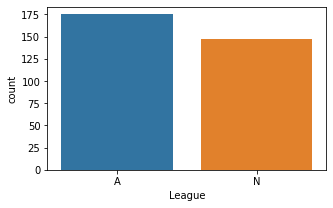

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
W    165
E    157
Name: Division, dtype: int64


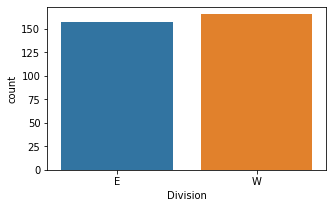

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
A    176
N    146
Name: NewLeague, dtype: int64


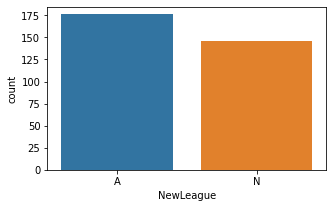

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


In [107]:
# unique classes and their frequencies in categorical variables 

for i in cat_cols:
    
    print(df[i].value_counts())
    
    fig, ax = plt.subplots(figsize=(5,3))
    
    sns.countplot(x=df[i], data=df, ax=ax)
    
    plt.show()
    
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")

### 1.4.2 Analysis of Numeric Variables

,count,mean,std,min,5%,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,99%,max
AtBat,322.000,380.929,153.405,16.000,161.000,194.100,221.800,281.300,321.800,379.500,430.200,490.000,535.600,584.900,609.900,658.590,687.000
Hits,322.000,101.025,46.455,1.000,39.000,45.100,57.000,70.000,82.000,96.000,113.000,128.700,144.000,163.000,174.000,210.790,238.000
HmRun,322.000,10.770,8.709,0.000,0.000,1.000,3.000,5.000,6.000,8.000,10.600,14.000,18.000,24.000,28.950,33.000,40.000
Runs,322.000,50.910,26.024,0.000,17.000,20.100,27.000,33.000,41.000,48.000,55.600,66.000,75.800,89.000,94.000,107.790,130.000
RBI,322.000,48.028,26.167,0.000,14.000,19.000,26.000,30.000,36.400,44.000,49.000,58.000,73.000,86.000,96.000,112.370,121.000
Walks,322.000,38.742,21.639,0.000,11.050,15.000,20.000,24.000,30.000,35.000,40.000,48.700,59.000,69.900,78.000,93.580,105.000
Years,322.000,7.444,4.926,1.000,1.000,2.000,3.000,4.000,5.000,6.000,7.600,10.000,12.000,15.000,17.000,19.790,24.000
CAtBat,322.000,2648.683,2324.206,19.000,216.500,342.200,667.600,963.400,1402.200,1928.000,2654.000,3365.000,4483.000,6123.400,7125.600,8749.970,14053.000
CHits,322.000,717.571,654.473,4.000,54.000,86.000,164.600,238.000,355.800,508.000,708.200,911.100,1229.200,1659.600,2017.150,2500.340,4256.000
CHmRun,322.000,69.491,86.266,0.000,2.000,4.000,10.200,16.300,27.400,37.500,51.200,72.400,103.800,194.900,265.650,373.120,548.000


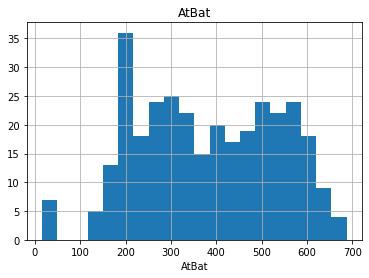

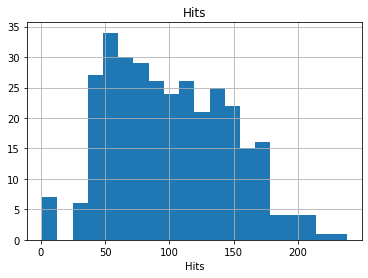

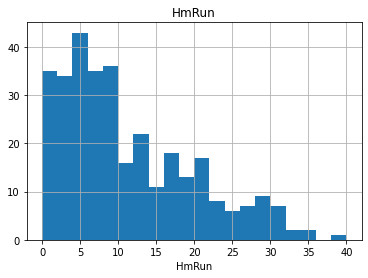

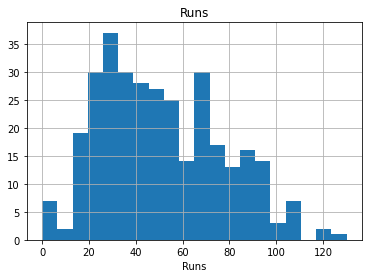

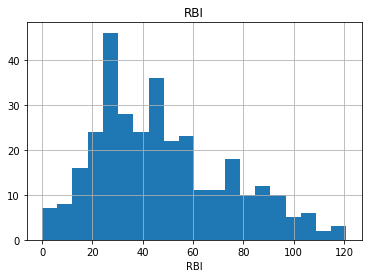

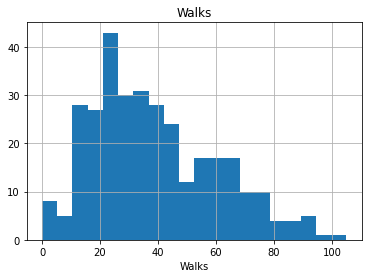

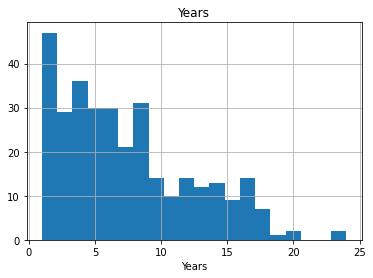

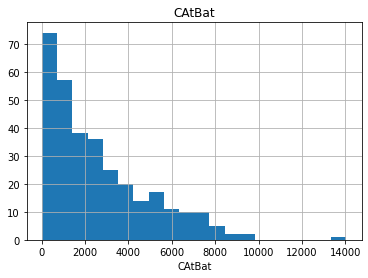

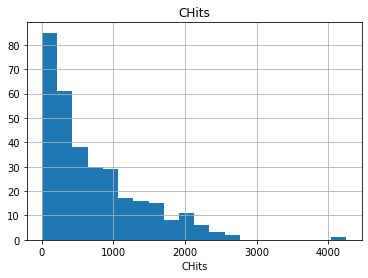

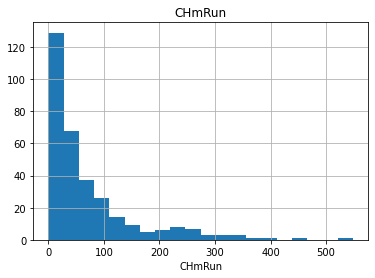

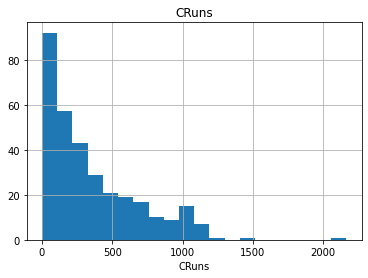

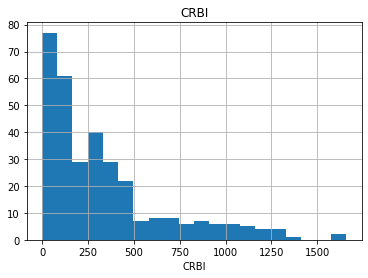

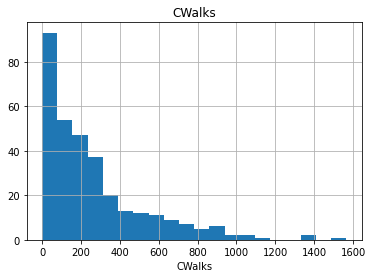

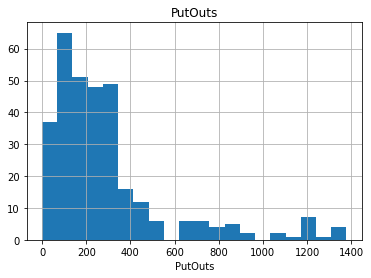

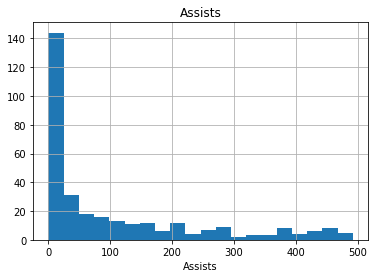

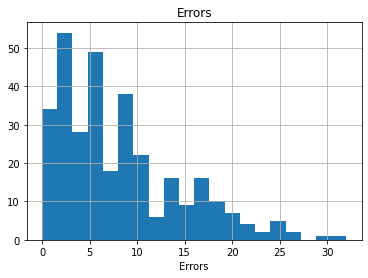

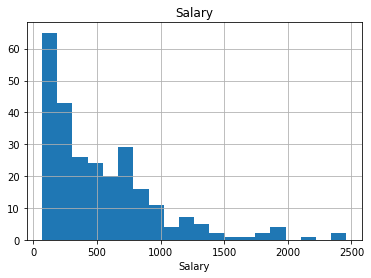

In [108]:
quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
display(df.describe(quantiles).T)

for i in num_cols:
    
    df[i].hist(bins=20)
    plt.xlabel(i)
    plt.title(i)
    plt.show()

### 1.4.3 Queries

In [109]:
# Is there anyone who plays in "league" A now and will play in "league" N next year or vice versa? yes there is
# if yes how many people? 19 people

display(df.loc[df["League"] != df["NewLeague"]])

print("#####################################")

print(len(df.loc[df["League"] != df["NewLeague"]]))

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
21,426,109,3,55,43,62,1,426,109,3,55,43,62,A,W,361,22,2,115.000,N
75,424,119,6,57,46,13,9,3651,1046,32,461,301,112,A,E,224,286,8,850.000,N
76,351,97,4,55,29,39,4,1258,353,16,196,110,117,N,W,226,7,3,210.000,A
111,325,76,16,33,52,37,5,1506,351,71,195,219,214,N,W,726,87,3,385.000,A
123,340,84,11,62,33,47,5,1516,376,42,284,141,219,N,E,185,8,4,400.000,A
138,284,69,1,33,18,25,5,1407,361,6,139,98,111,A,E,122,140,5,NaN,N
139,438,103,2,65,32,71,2,440,103,2,67,32,71,A,W,276,7,9,100.000,N
162,165,39,2,13,9,16,3,196,44,2,18,10,18,A,W,332,19,2,75.000,N
164,257,66,5,31,26,32,14,3910,979,33,518,324,382,N,W,87,166,14,250.000,A


#####################################
19


In [110]:
# "Salary" information according to the level of players playing in the E and W divisions of the 86 league

df.groupby(["League","Division"])[["Salary"]].agg(["min","max","mean"])

Salary                 
                   min      max    mean
League Division                        
A      E        67.500 2460.000 670.850
       W        68.000 1500.000 418.594
N      E        70.000 2127.333 572.348
       W        75.000 1900.000 487.259

In [111]:
# "Salary" information according to the level of play who will play in the E and W divisions of the 87 league

df.groupby(["NewLeague","Division"])[["Salary"]].agg(["min","max","mean"])

Salary                 
                      min      max    mean
NewLeague Division                        
A         E        67.500 2460.000 651.272
          W        68.000 1500.000 427.711
N         E        70.000 2127.333 593.221
          W        75.000 1900.000 477.780

In [112]:
# how many rookies, how many experienced players are there?. there is 24 years old player! 4-year-experinced players are the most numbers, rookies (1.2) quite a lot

df["Years"].value_counts()

4     36
5     30
6     30
3     29
2     25
1     22
7     21
8     16
9     15
10    14
12    14
14    13
13    12
11    10
15     9
18     7
17     7
16     7
20     2
24     1
23     1
19     1
Name: Years, dtype: int64

In [113]:
# The min, mean and max value for the "Salary" variable
# The salary of the 24-year-experience player is above the average, but the old school is not valued :(

display(df[["Salary"]].agg(["min","mean","max"]).T)

print("###############")

display(df[["Years","Salary"]].loc[df["Years"] == 24])

,min,mean,max
Salary,67.500,535.926,2460.000


###############


,Years,Salary
236,24,750.000


In [114]:
# Statistics of experience, number of errors and salary of the top 10 players who made the most errors
# The minimum salary in the dataset is 67.5, but the top 10 observations of those who make the most mistakes do not have this minimum value
# there are other factors that affect the low salary

df[["Years","Errors","Salary"]].sort_values("Errors",ascending =False).head(10)

,Years,Errors,Salary
276,2,32,155.000
260,7,29,875.000
116,4,26,155.000
92,1,26,70.000
33,5,25,612.500
206,2,25,150.000
166,4,25,640.000
5,11,25,750.000
35,14,24,850.000
68,4,23,105.000


In [115]:
# those who have neither helped their friends, nor assisted or made errors during the season.

df.loc[(df["PutOuts"] == 0) & (df["Assists"] == 0) & (df["Errors"] == 0)]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,A,E,0,0,0,NaN,A
52,19,7,0,1,2,1,4,41,13,1,3,4,4,A,E,0,0,0,NaN,A
65,585,139,31,93,94,62,17,7546,1982,315,1141,1179,727,A,E,0,0,0,950.000,A
125,315,59,16,45,36,58,13,4677,1051,268,681,782,697,A,W,0,0,0,NaN,A
132,278,70,7,22,37,18,18,7186,2081,190,935,1088,643,A,W,0,0,0,325.000,A
149,210,70,13,32,51,28,15,4040,1130,97,544,462,551,A,E,0,0,0,365.000,A
158,336,93,9,35,46,23,15,5779,1610,128,730,741,497,A,W,0,0,0,NaN,A
186,344,85,24,69,64,88,7,911,214,64,150,156,187,A,W,0,0,0,300.000,A
196,464,128,28,67,94,52,13,5829,1552,210,740,840,452,A,W,0,0,0,587.500,A


-----------------

## 1.5 - Correlation of Variables

In [116]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000,0.968,0.592,0.913,0.821,0.670,0.047,0.236,0.253,0.237,0.267,0.244,0.166,0.318,0.354,0.352,0.395
Hits,0.968,1.000,0.562,0.922,0.811,0.641,0.045,0.228,0.256,0.203,0.262,0.232,0.152,0.311,0.320,0.310,0.439
HmRun,0.592,0.562,1.000,0.651,0.855,0.481,0.116,0.222,0.221,0.493,0.262,0.352,0.233,0.283,-0.106,0.039,0.343
Runs,0.913,0.922,0.651,1.000,0.798,0.732,0.005,0.186,0.205,0.228,0.251,0.206,0.182,0.279,0.221,0.240,0.420
RBI,0.821,0.811,0.855,0.798,1.000,0.616,0.146,0.295,0.308,0.442,0.323,0.393,0.251,0.343,0.107,0.193,0.449
Walks,0.670,0.641,0.481,0.732,0.616,1.000,0.136,0.277,0.281,0.332,0.338,0.309,0.425,0.300,0.150,0.129,0.444
Years,0.047,0.045,0.116,0.005,0.146,0.136,1.000,0.920,0.904,0.727,0.883,0.869,0.839,-0.005,-0.081,-0.162,0.401
CAtBat,0.236,0.228,0.222,0.186,0.295,0.277,0.920,1.000,0.995,0.799,0.983,0.949,0.907,0.062,0.002,-0.067,0.526
CHits,0.253,0.256,0.221,0.205,0.308,0.281,0.904,0.995,1.000,0.783,0.985,0.945,0.891,0.077,-0.003,-0.063,0.549
CHmRun,0.237,0.203,0.493,0.228,0.442,0.332,0.727,0.799,0.783,1.000,0.820,0.929,0.800,0.113,-0.159,-0.138,0.525


### 1.5.1 Heatmap

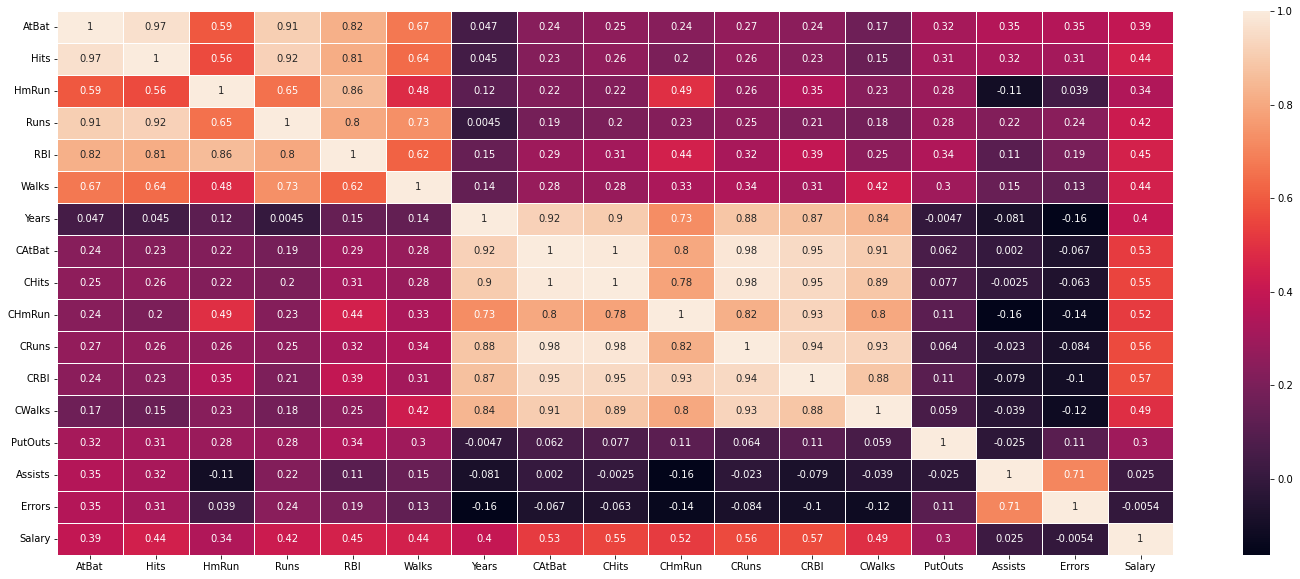

In [117]:
# The first three variables that show the best positive correlation with the "Salary" variable are "CRBI", "CRuns", "CHits"
# The first three variables that show the weakest positive correlation with the "Salary" variable are "Assists", "PutOuts", "HmRuns"
# Variable showing negative correlation with "Salary" is "Errors" variable

fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

-------------------

## 1.6 - Outliers

### 1.6.1 Graphs outliers by BoxPlot 

In [118]:
## Function that displays numeric variables as boxplot graphs, respectively

def graph_outliers(dataframe):
    
    for col in num_cols:
        
        sns.boxplot(x= df[col]);
        
        plt.show()

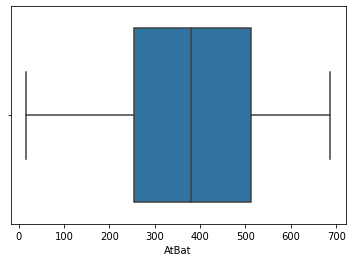

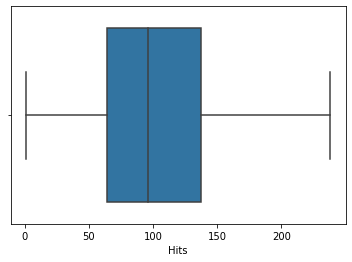

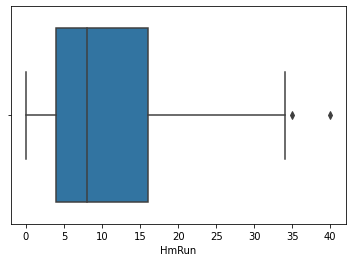

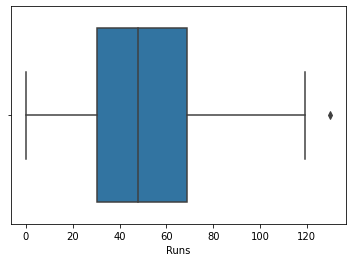

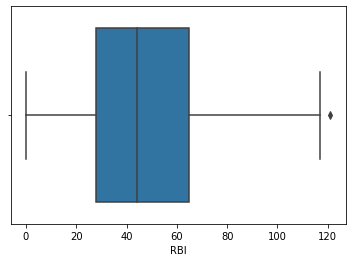

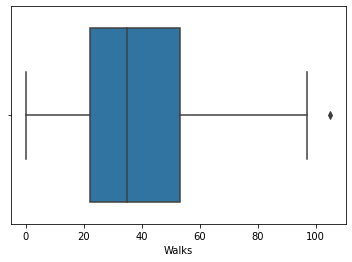

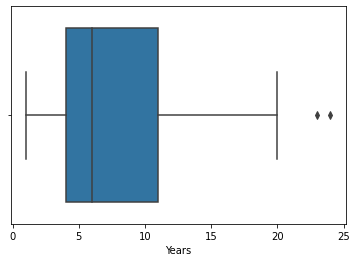

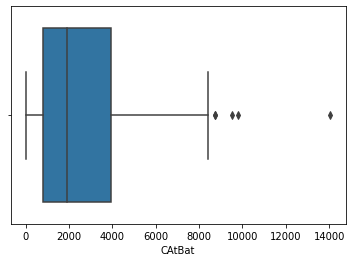

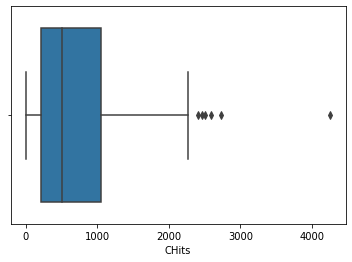

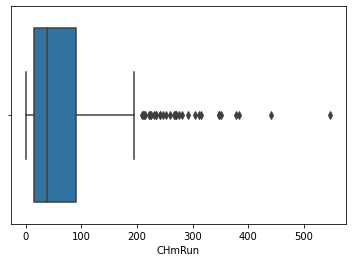

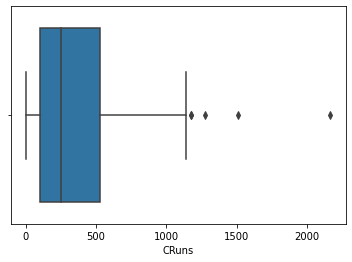

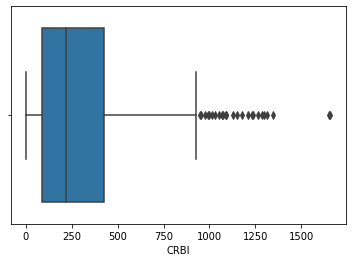

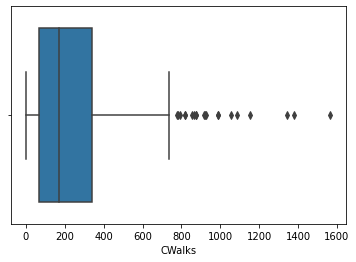

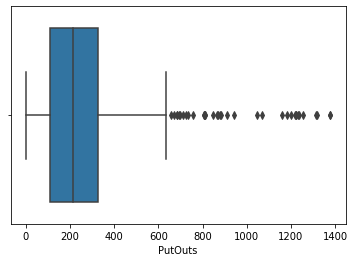

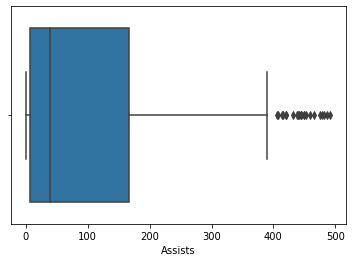

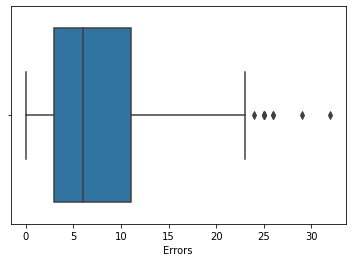

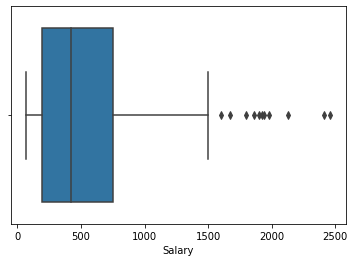

In [119]:
# There are outliers in numerical variables after "HmRuns" variable

graph_outliers(df)

### 1.6.2 Up and Down Values for Thresholds

In [120]:
# Finding Thresholds values (limit percentages for Threshold 0.25-0.75)

def outlier_thresholds(dataframe, col_name, q1=0.20, q3=0.75):
    
    quartile1 = dataframe[col_name].quantile(q1)
    
    quartile3 = dataframe[col_name].quantile(q3)
    
    interquantile_range = quartile3 - quartile1
    
    up_limit = quartile3 + 1.5 * interquantile_range
    
    low_limit = quartile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

In [121]:
# threshold values for each variable according to the given percentile 

for col in df.columns:
    
    if (df[col].dtype != "O") and (df[col].nunique() > 10):
        
        print(f"{col}------> Low: {round(outlier_thresholds(df,col)[0])} \
        ---------Up:{round(outlier_thresholds(df,col)[1])}")

AtBat------> Low: -213         ---------Up:947
Hits------> Low: -63         ---------Up:257
HmRun------> Low: -16         ---------Up:36
Runs------> Low: -36         ---------Up:132
RBI------> Low: -32         ---------Up:123
Walks------> Low: -30         ---------Up:102
Years------> Low: -9         ---------Up:23
CAtBat------> Low: -4217         ---------Up:8809
CHits------> Low: -1177         ---------Up:2401
CHmRun------> Low: -109         ---------Up:210
CRuns------> Low: -588         ---------Up:1195
CRBI------> Low: -464         ---------Up:960
CWalks------> Low: -371         ---------Up:766
PutOuts------> Low: -238         ---------Up:663
Assists------> Low: -236         ---------Up:407
Errors------> Low: -9         ---------Up:23
Salary------> Low: -738         ---------Up:1642


### 1.6.3 Variables with Outliners and Replacing

In [122]:
# the function for find variable with outliners

def find_fill_outliers(dataframe, col_name, fill=False):
    
    """
    INFO
        this function is for check outliners of a given dataframe and 
        fill the outliners in dataframe with up and down thresholds values if you wish
    
    PARAMETERS
        dataframe: pandas dataframe 
        col_name: numeric variables, in list format 
        fill:  if True, replace outliners with up and down thresholds values, default=False

    """
    
    outliers_col = []
    
    for col in col_name:
        
        low_limit, up_limit = outlier_thresholds(dataframe, col)
    
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
        
            outliers_col.append(col)
            
        if fill: 
        
            dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
    
            dataframe.loc[(dataframe[col] > up_limit), col] = up_limit
        
    
    return outliers_col 

In [123]:
# variables with outliers (down :0.25, up: 0.75 thresholds): 13 variables

find_fill_outliers(df, num_cols)

['HmRun',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [124]:
# replace outliners with up and down thresholds values

outlier_col = find_fill_outliers(df, num_cols, fill=True)

In [125]:
# variables with outliers after run the function

find_fill_outliers(df, num_cols)

[]

--------------------

## 1.7- Missing Values

In [126]:
# "Salary" variable has 59 missing observations

df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

### 1.7.1 Filling Missing Values

**Queries**

In [127]:
# Average of "Salary" variable in "League" and "Division" groupby

df.groupby(["League","Division"])["Salary"].mean()

League  Division
A       E          638.990
        W          418.594
N       E          552.301
        W          483.172
Name: Salary, dtype: float64

In [128]:
# Among the players who are in League A and playing in the E division, those who are missing the Salary variable

df.loc[(df["Salary"].isnull()) & (df["League"] == "A") & (df["Division"] == "E")].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293.000,66,1.000,30,29.000,14.000,1,293.000,66.000,1.000,30.000,29.000,14.000,A,E,446.000,33.000,20,NaN,A
36,161.000,36,0.000,19,10.000,17.000,4,1053.000,244.000,3.000,156.000,86.000,107.000,A,E,70.000,149.000,12,NaN,A
38,346.000,98,5.000,31,53.000,30.000,16,5913.000,1615.000,209.700,784.000,901.000,560.000,A,E,0.000,0.000,0,NaN,A
44,194.000,40,7.000,19,29.000,30.000,11,4183.000,1069.000,64.000,486.000,493.000,608.000,A,E,325.000,22.000,2,NaN,A
48,542.000,140,12.000,46,75.000,41.000,16,7099.000,2130.000,209.700,987.000,960.325,431.000,A,E,663.100,61.000,9,NaN,A


In [129]:
# Average salary of League A players playing in Division E

df.groupby(["League","Division"])["Salary"].mean()["A","E"]

638.9898529411764

In [130]:
# Among the players who are in League N and playing in the W division, those who are missing the Salary variable

df.loc[(df["Salary"].isnull()) & (df["League"] == "N") & (df["Division"] == "W")].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
32,517.000,141,27.000,70,87.000,52.000,9,3571.000,994.000,209.700,545.000,652.000,337.000,N,W,663.100,102.000,8,NaN,N
39,241.000,61,1.000,34,12.000,14.000,1,241.000,61.000,1.000,34.000,12.000,14.000,N,W,166.000,172.000,10,NaN,N
41,216.000,54,0.000,21,18.000,15.000,18,7318.000,1926.000,46.000,796.000,627.000,483.000,N,W,103.000,84.000,5,NaN,N
42,200.000,57,6.000,23,14.000,14.000,9,2516.000,684.000,46.000,371.000,230.000,195.000,N,W,69.000,1.000,1,NaN,N
94,278.000,69,3.000,24,21.000,29.000,8,2079.000,565.000,32.000,258.000,192.000,162.000,N,W,142.000,210.000,10,NaN,N


In [131]:
# Average salary of League N players playing in Division W

df.groupby(["League","Division"])["Salary"].mean()["N","W"]

483.17196825396826

**Fill the Missing Salary Variable**

In [132]:
# Eksik değişkenleri League ve Division kırılımana göre doldurma (A,E)(A,W)(N,E)(N,W)

df.loc[(df["Salary"].isnull()) & (df["League"] == "A") & (df["Division"] == "E"), "Salary"] = df.groupby(["League","Division"])["Salary"].mean()["A","E"]
df.loc[(df["Salary"].isnull()) & (df["League"] == "A") & (df["Division"] == "W"), "Salary"] = df.groupby(["League","Division"])["Salary"].mean()["A","W"]
df.loc[(df["Salary"].isnull()) & (df["League"] == "N") & (df["Division"] == "E"), "Salary"] = df.groupby(["League","Division"])["Salary"].mean()["N","E"]
df.loc[(df["Salary"].isnull()) & (df["League"] == "N") & (df["Division"] == "W"), "Salary"] = df.groupby(["League","Division"])["Salary"].mean()["N","W"]

In [133]:
# Salary değişkeni kontrol

df["Salary"].isnull().any()

False

-----------------

# 2 - Salary Estimation Results Without Using Feature Engineering

_problem is a salary estimation, it becomes a regression problem_

## 2.1 - Graphical Output by joinplot

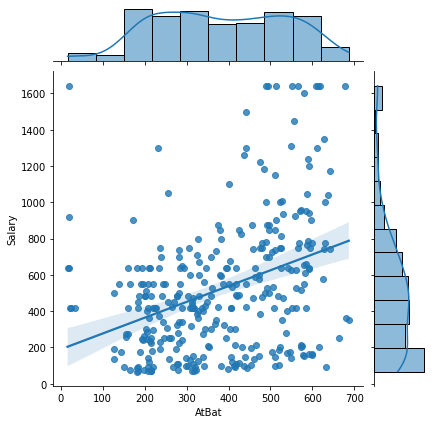

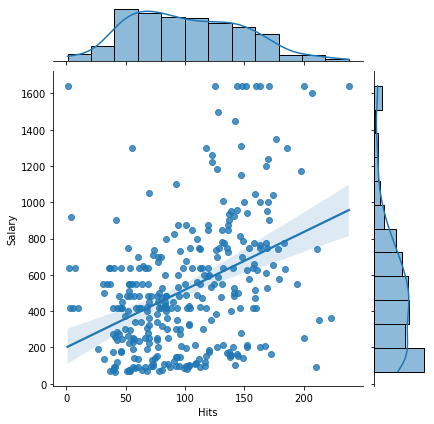

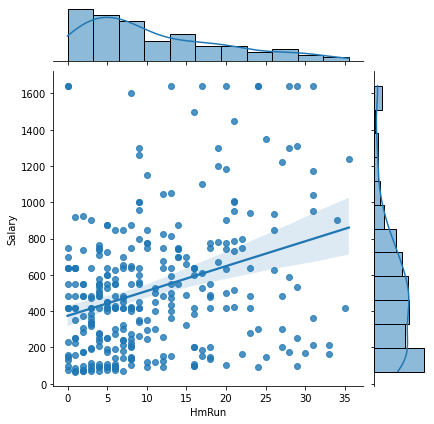

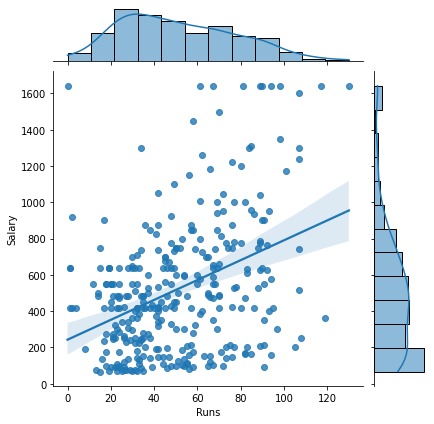

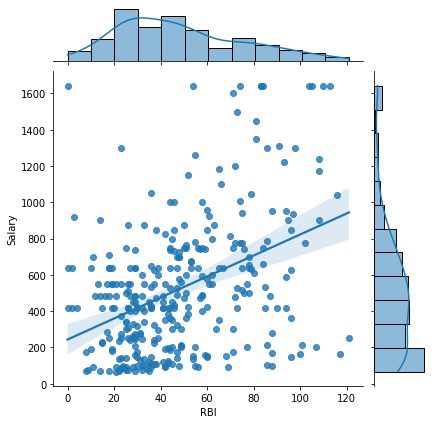

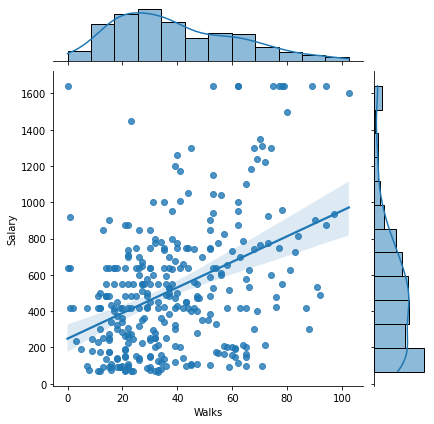

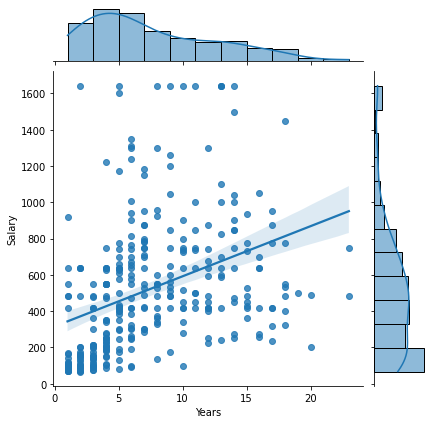

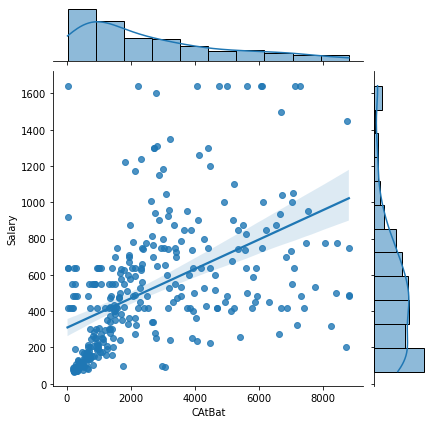

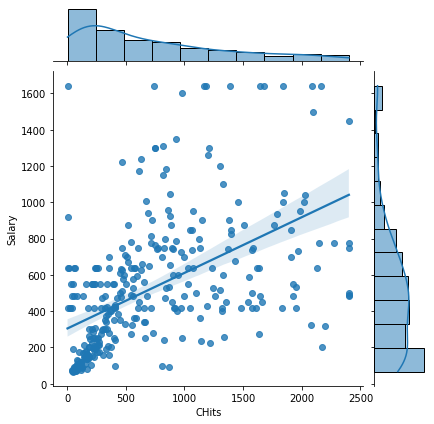

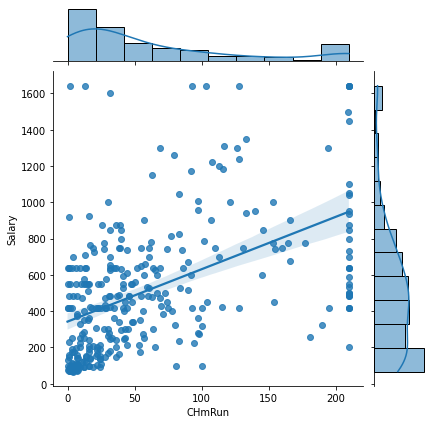

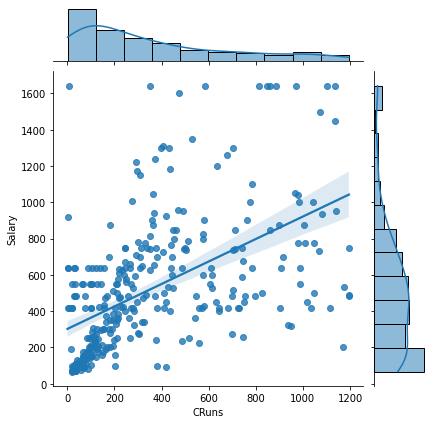

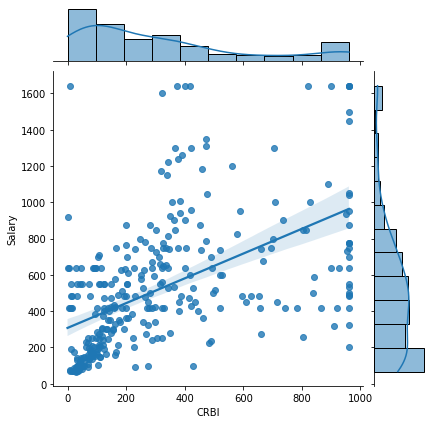

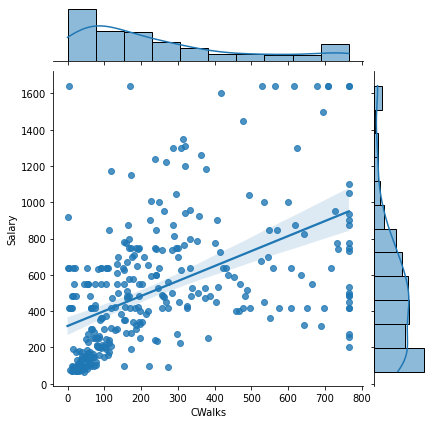

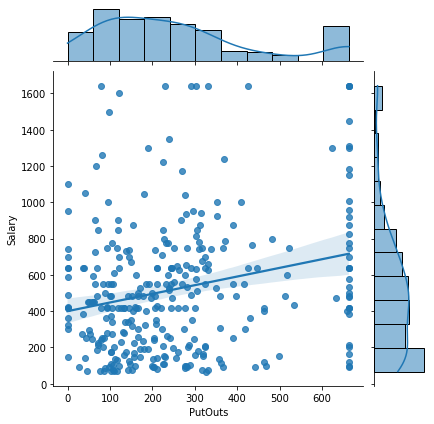

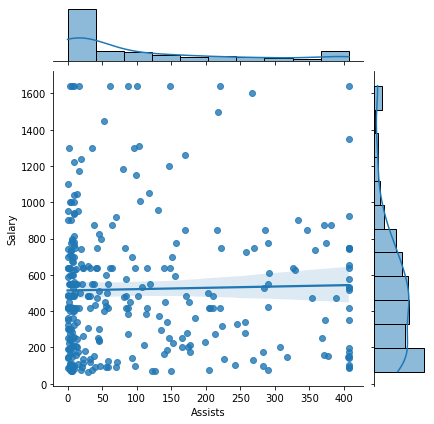

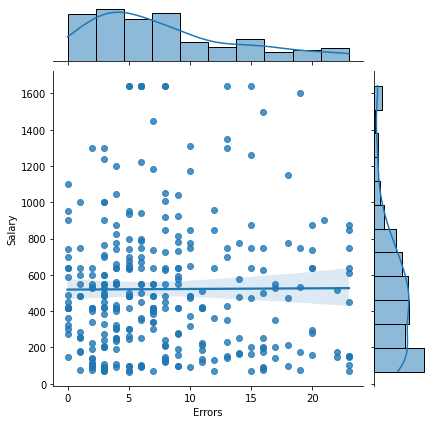

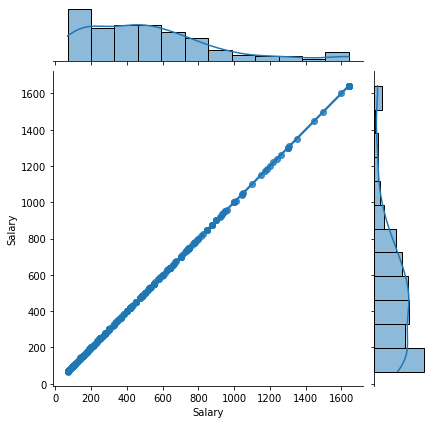

In [134]:
# Graphical representation of the relationship between dependent and independent variables with joinplot
# Blue dots actual intersection values
# Blue line trend
# A histogram of the distribution of data on the upper and right axis
# According to graphics "Assists" and "Errors" are not linear relationship with "Salary"
# https://seaborn.pydata.org/generated/seaborn.jointplot.html

for i in num_cols:
    
    sns.jointplot(x=i, y="Salary", kind ="reg", data=df);

-------------------

## 2.2 - Multiple Linear Regression

In [135]:
# Assign dependent and independent variables X and y.
# Subtract the categorical and dependent variable from the independent variables

X = df.drop(["League","Division","NewLeague","Salary"], axis =1)
y = df[["Salary"]]

In [136]:
X.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293.000,66,1.000,30,29.000,14.000,1,293.000,66.000,1.000,30.000,29.000,14.000,446.000,33.000,20
1,315.000,81,7.000,24,38.000,39.000,14,3449.000,835.000,69.000,321.000,414.000,375.000,632.000,43.000,10


In [137]:
y.head(2)

,Salary
0,638.990
1,475.000


### 2.2.1 Setting up the Model without Separating as Test and Train

In [138]:
lm  = LinearRegression()
model = lm.fit(X,y)

In [139]:
# Intercept Value

np.round(model.intercept_[0],2)

266.73

In [140]:
# coefficients of the variables. We have 16 numeric variables excluding the Salary variable

np.round(model.coef_[0],2)

array([ -1.08,   3.07,   2.26,   0.61,   0.32,   1.68, -13.45,  -0.35,
         1.06,  -0.5 ,   0.57,   0.59,   0.2 ,   0.33,   0.33,  -3.66])

### Formül

**Salary = 267 + (-1.08 * AtBat) + (3.07 * Hits) + (2.26 * HmRun) + (0.61 * Runs) + (0.32 * RBI) + (1.68 * Walks) + (-13.45 * Years) + (-0.35 * CAtBat) + (1.06 * CHits) + (-0.5 * CHmRun) + (0.57 * CRuns) + (0.59 * CRBI) + (0.2 * CWalks) + (0.33 * PutOuts) + (0.33 * Assists) + (-3.66 * Errors)**

In [141]:
# R2 value: what percentage of the change in the dependent variable can be explained by the independent variables.

np.round(model.score(X,y),2)

0.46

-------------

### 2.2.2 Success of the Prediction Model

* With RMSE, we calculate the average error value per unit of our errors, that is, the differences between the actual values and the estimated values.

In [142]:
# root_mean_squared_error 

RMSE = np.sqrt(mean_squared_error(y,model.predict(X)))
np.round(RMSE,2)

271.96

-----------------

### Example Estimate

In [143]:
# creation of a new player's information in a dataset

player_data1 =[[310],[105],[15],[80],[35],[20],[4],[1500],[800],[100],[330],[350],[260],[0],[0],[10]]
new_data = pd.DataFrame(player_data1).T

player_data2 =[[0],[0],[15],[80],[350],[20],[4],[1500],[1000],[100],[330],[350],[260],[200],[100],[1]]
new_data1 = pd.DataFrame(player_data2).T

display(new_data)
display(new_data1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,310,105,15,80,35,20,4,1500,800,100,330,350,260,0,0,10


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,15,80,350,20,4,1500,1000,100,330,350,260,200,100,1


In [144]:
# Salary estimate of this player: 1007.6 units

print("player 1:", round(model.predict(new_data)[0][0],2))
print("player 2:",round(model.predict(new_data1)[0][0],2))

player 1: 1007.6
player 2: 1464.89


----------------

### 2.2.3 - Setting up the Model with Separating as Test and Train

In [145]:
# random_state is for getting the same train test combination in each time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# Set up model

reg_model = LinearRegression().fit(X_train, y_train)

In [146]:
# size of train and test datasets

print("X_test data shape:",X_test.shape)
print("X_train data shape:", X_train.shape)
print("y_test data shape:",y_test.shape)
print("y_train data shape:", y_train.shape)

X_test data shape: (65, 16)
X_train data shape: (257, 16)
y_test data shape: (65, 1)
y_train data shape: (257, 1)


In [147]:
# intercept and coeficiant of independet variables

print(np.round(reg_model.intercept_[0],2))
print(np.round(reg_model.coef_[0],2))

275.85
[ -0.9    1.11   2.41   2.9    0.23   0.86 -12.4   -0.52   1.8   -0.2
   0.21   0.68   0.28   0.41   0.58  -6.06]


### Example Estimate

In [148]:
# Salary estimate of the same players whose values are described above

print("player 1:", round(reg_model.predict(new_data)[0][0],2))
print("player 2:",round(reg_model.predict(new_data1)[0][0],2))

player 1: 1310.54
player 2: 2099.37


-----------------------

### 2.2.4 - Evaluating Model Forecasting Success

### *2.2.4.1 With Test Set (holdout)*

### A - train error

In [149]:
# predicted y value
y_pred = reg_model.predict(X_train)

# The difference between the actual and the predicted y-value. The goal is minimize the difference
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred))

# RMSE train value
np.round(RMSE_train,2)

273.41

In [150]:
# R2 Tarin
np.round(reg_model.score(X_train, y_train),3)

0.504

### B - test error

In [151]:
# predicted y value
y_pred = reg_model.predict(X_test)

# The difference between the actual and the predicted y-value. The goal is minimize the difference
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))

# rmse value
np.round(RMSE_test,2)

283.54

In [152]:
# R2 Test

np.round(reg_model.score(X_test, y_test),3)

-0.091

### *2.2.4.2  with K-Fold Cross Validation*

In [153]:
# cv :Fold numbers

cv=cross_val_score(model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error")
cv

array([ -61184.59428073,  -55128.78479003,  -94676.14142392,
       -111841.23584054,  -62732.54121092, -168254.10620636,
        -42302.69373634, -123883.36050518,  -87990.87755438,
        -87960.1485405 ])

In [154]:
# Root mean square error (RMSE) for train set - validation error

RMSE_cross = np.sqrt(np.mean(-cv))
np.round(RMSE_cross,2)

299.32

-------------------

# 3 - Modeling Data Using Feature Engineering

## 3.1 - Creating New Variables

### 1. Calculation the annual average statistical values of each player. For example, the number of hits he made this year / the number of hits in his collecting career

In [155]:
df["AVG_AtBat"] = df["CAtBat"] / df["Years"] 
df["AVG_CHits"] = df["CHits"] / df["Years"] 
df["AVG_CHmRun"] = df["CHmRun"] / df["Years"] 
df["AVG_CRuns"] = df["CRuns"] / df["Years"] 
df["AVG_CRBI"] = df["CRBI"] / df["Years"] 
df["AVG_CWalks"] = df["CWalks"] / df["Years"]

In [156]:
df.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,AVG_AtBat,AVG_CHits,AVG_CHmRun,AVG_CRuns,AVG_CRBI,AVG_CWalks
0,293.000,66,1.000,30,29.000,14.000,1,293.000,66.000,1.000,30.000,29.000,14.000,A,E,446.000,33.000,20,638.990,A,293.000,66.000,1.000,30.000,29.000,14.000
1,315.000,81,7.000,24,38.000,39.000,14,3449.000,835.000,69.000,321.000,414.000,375.000,N,W,632.000,43.000,10,475.000,N,246.357,59.643,4.929,22.929,29.571,26.786
2,479.000,130,18.000,66,72.000,76.000,3,1624.000,457.000,63.000,224.000,266.000,263.000,A,W,663.100,82.000,14,480.000,A,541.333,152.333,21.000,74.667,88.667,87.667


### 2. How many percent increase or decrease each player's performance in this year compared to the average performance of all years

In [157]:
df["PERF_AtBat"] = (( df["AtBat"] - df["AVG_AtBat"]) / df["AVG_AtBat"]) * 100
df["PERF_Hits"] =  (( df["Hits"] - df["AVG_CHits"]) / df["AVG_CHits"]) * 100
df["PERF_HmRun"] = (( df["HmRun"] - df["AVG_CHmRun"]) / df["AVG_CHmRun"]) * 100  
df["PERF_Runs"] = (( df["Runs"] - df["AVG_CRuns"]) / df["AVG_CRuns"]) * 100 
df["PERF_RBI"] = (( df["RBI"] - df["AVG_CRBI"]) / df["AVG_CRBI"]) * 100  
df["PERF_Walks"] = (( df["Walks"] - df["AVG_CWalks"]) / df["AVG_CWalks"]) * 100 

In [158]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,AVG_AtBat,AVG_CHits,AVG_CHmRun,AVG_CRuns,AVG_CRBI,AVG_CWalks,PERF_AtBat,PERF_Hits,PERF_HmRun,PERF_Runs,PERF_RBI,PERF_Walks
0,293.000,66,1.000,30,29.000,14.000,1,293.000,66.000,1.000,30.000,29.000,14.000,A,E,446.000,33.000,20,638.990,A,293.000,66.000,1.000,30.000,29.000,14.000,0.000,0.000,0.000,0.000,0.000,0.000
1,315.000,81,7.000,24,38.000,39.000,14,3449.000,835.000,69.000,321.000,414.000,375.000,N,W,632.000,43.000,10,475.000,N,246.357,59.643,4.929,22.929,29.571,26.786,27.863,35.808,42.029,4.673,28.502,45.600
2,479.000,130,18.000,66,72.000,76.000,3,1624.000,457.000,63.000,224.000,266.000,263.000,A,W,663.100,82.000,14,480.000,A,541.333,152.333,21.000,74.667,88.667,87.667,-11.515,-14.661,-14.286,-11.607,-18.797,-13.308
3,496.000,141,20.000,65,78.000,37.000,11,5628.000,1575.000,209.700,828.000,838.000,354.000,N,E,200.000,11.000,3,500.000,N,511.636,143.182,19.064,75.273,76.182,32.182,-3.056,-1.524,4.912,-13.647,2.387,14.972
4,321.000,87,10.000,39,42.000,30.000,2,396.000,101.000,12.000,48.000,46.000,33.000,N,E,663.100,40.000,4,91.500,N,198.000,50.500,6.000,24.000,23.000,16.500,62.121,72.277,66.667,62.500,82.609,81.818


### 3. Separation of each player as "Rookie","Mid","Senior","Expert" according to the year spent in baseball

In [159]:
df["PLAYER_LEVEL"] = pd.qcut(df["Years"], 4, labels=["Rookie","Mid","Senior","Expert"])
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,AVG_AtBat,AVG_CHits,AVG_CHmRun,AVG_CRuns,AVG_CRBI,AVG_CWalks,PERF_AtBat,PERF_Hits,PERF_HmRun,PERF_Runs,PERF_RBI,PERF_Walks,PLAYER_LEVEL
0,293.000,66,1.000,30,29.000,14.000,1,293.000,66.000,1.000,30.000,29.000,14.000,A,E,446.000,33.000,20,638.990,A,293.000,66.000,1.000,30.000,29.000,14.000,0.000,0.000,0.000,0.000,0.000,0.000,Rookie
1,315.000,81,7.000,24,38.000,39.000,14,3449.000,835.000,69.000,321.000,414.000,375.000,N,W,632.000,43.000,10,475.000,N,246.357,59.643,4.929,22.929,29.571,26.786,27.863,35.808,42.029,4.673,28.502,45.600,Expert
2,479.000,130,18.000,66,72.000,76.000,3,1624.000,457.000,63.000,224.000,266.000,263.000,A,W,663.100,82.000,14,480.000,A,541.333,152.333,21.000,74.667,88.667,87.667,-11.515,-14.661,-14.286,-11.607,-18.797,-13.308,Rookie
3,496.000,141,20.000,65,78.000,37.000,11,5628.000,1575.000,209.700,828.000,838.000,354.000,N,E,200.000,11.000,3,500.000,N,511.636,143.182,19.064,75.273,76.182,32.182,-3.056,-1.524,4.912,-13.647,2.387,14.972,Senior
4,321.000,87,10.000,39,42.000,30.000,2,396.000,101.000,12.000,48.000,46.000,33.000,N,E,663.100,40.000,4,91.500,N,198.000,50.500,6.000,24.000,23.000,16.500,62.121,72.277,66.667,62.500,82.609,81.818,Rookie


### 4. Creating a new variable based on the player's next season League change

In [160]:
df.loc[df["League"] != df["NewLeague"],"LEAGUE_CHANGE"] = "changed"
df.loc[df["League"] == df["NewLeague"],"LEAGUE_CHANGE"] = "not_changed"

In [161]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,AVG_AtBat,AVG_CHits,AVG_CHmRun,AVG_CRuns,AVG_CRBI,AVG_CWalks,PERF_AtBat,PERF_Hits,PERF_HmRun,PERF_Runs,PERF_RBI,PERF_Walks,PLAYER_LEVEL,LEAGUE_CHANGE
0,293.000,66,1.000,30,29.000,14.000,1,293.000,66.000,1.000,30.000,29.000,14.000,A,E,446.000,33.000,20,638.990,A,293.000,66.000,1.000,30.000,29.000,14.000,0.000,0.000,0.000,0.000,0.000,0.000,Rookie,not_changed
1,315.000,81,7.000,24,38.000,39.000,14,3449.000,835.000,69.000,321.000,414.000,375.000,N,W,632.000,43.000,10,475.000,N,246.357,59.643,4.929,22.929,29.571,26.786,27.863,35.808,42.029,4.673,28.502,45.600,Expert,not_changed
2,479.000,130,18.000,66,72.000,76.000,3,1624.000,457.000,63.000,224.000,266.000,263.000,A,W,663.100,82.000,14,480.000,A,541.333,152.333,21.000,74.667,88.667,87.667,-11.515,-14.661,-14.286,-11.607,-18.797,-13.308,Rookie,not_changed
3,496.000,141,20.000,65,78.000,37.000,11,5628.000,1575.000,209.700,828.000,838.000,354.000,N,E,200.000,11.000,3,500.000,N,511.636,143.182,19.064,75.273,76.182,32.182,-3.056,-1.524,4.912,-13.647,2.387,14.972,Senior,not_changed
4,321.000,87,10.000,39,42.000,30.000,2,396.000,101.000,12.000,48.000,46.000,33.000,N,E,663.100,40.000,4,91.500,N,198.000,50.500,6.000,24.000,23.000,16.500,62.121,72.277,66.667,62.500,82.609,81.818,Rookie,not_changed


### 5. Evaluation of the players' performance this year based on their Total performance (by İzzet Topçuoğlu)

In [162]:
df["DIV_CAtBat"] = df["AtBat"]/df["CAtBat"] 
df["DIV_CHits"] = df["Hits"]/df["CHits"] 
df["DIV_CHmRun"] = df["HmRun"]/df["CHmRun"] 
df["DIV_Cruns"] = df["Runs"]/df["CRuns"] 
df["DIV_CRBI"] = df["RBI"]/df["CRBI"] 
df["DIV_CWalks"] = df["Walks"]/df["CWalks"]

In [163]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,AVG_AtBat,AVG_CHits,AVG_CHmRun,AVG_CRuns,AVG_CRBI,AVG_CWalks,PERF_AtBat,PERF_Hits,PERF_HmRun,PERF_Runs,PERF_RBI,PERF_Walks,PLAYER_LEVEL,LEAGUE_CHANGE,DIV_CAtBat,DIV_CHits,DIV_CHmRun,DIV_Cruns,DIV_CRBI,DIV_CWalks
0,293.000,66,1.000,30,29.000,14.000,1,293.000,66.000,1.000,30.000,29.000,14.000,A,E,446.000,33.000,20,638.990,A,293.000,66.000,1.000,30.000,29.000,14.000,0.000,0.000,0.000,0.000,0.000,0.000,Rookie,not_changed,1.000,1.000,1.000,1.000,1.000,1.000
1,315.000,81,7.000,24,38.000,39.000,14,3449.000,835.000,69.000,321.000,414.000,375.000,N,W,632.000,43.000,10,475.000,N,246.357,59.643,4.929,22.929,29.571,26.786,27.863,35.808,42.029,4.673,28.502,45.600,Expert,not_changed,0.091,0.097,0.101,0.075,0.092,0.104
2,479.000,130,18.000,66,72.000,76.000,3,1624.000,457.000,63.000,224.000,266.000,263.000,A,W,663.100,82.000,14,480.000,A,541.333,152.333,21.000,74.667,88.667,87.667,-11.515,-14.661,-14.286,-11.607,-18.797,-13.308,Rookie,not_changed,0.295,0.284,0.286,0.295,0.271,0.289
3,496.000,141,20.000,65,78.000,37.000,11,5628.000,1575.000,209.700,828.000,838.000,354.000,N,E,200.000,11.000,3,500.000,N,511.636,143.182,19.064,75.273,76.182,32.182,-3.056,-1.524,4.912,-13.647,2.387,14.972,Senior,not_changed,0.088,0.090,0.095,0.079,0.093,0.105
4,321.000,87,10.000,39,42.000,30.000,2,396.000,101.000,12.000,48.000,46.000,33.000,N,E,663.100,40.000,4,91.500,N,198.000,50.500,6.000,24.000,23.000,16.500,62.121,72.277,66.667,62.500,82.609,81.818,Rookie,not_changed,0.811,0.861,0.833,0.812,0.913,0.909


### 6. Create a variable that combines the players' level with the region they are playing (by Mehmet Akturk)

In [164]:
df.loc[(df["PLAYER_LEVEL"] == "Rookie") & (df["Division"] == "E"), 'LEVEL_DIV'] = "Rookie-East"
df.loc[(df["PLAYER_LEVEL"] == "Rookie") & (df["Division"] == "W"), 'LEVEL_DIV'] = "Rookie-West"
df.loc[(df["PLAYER_LEVEL"] == "Mid")    & (df["Division"] == "E"), 'LEVEL_DIV'] = "Mid-East"
df.loc[(df["PLAYER_LEVEL"] == "Mid")    & (df["Division"] == "W"), 'LEVEL_DIV'] = "Mid-West"
df.loc[(df["PLAYER_LEVEL"] == "Senior") & (df["Division"] == "E"), 'LEVEL_DIV'] = "Senior-East"
df.loc[(df["PLAYER_LEVEL"] == "Senior") & (df["Division"] == "W"), 'LEVEL_DIV'] = "Senior-West"
df.loc[(df["PLAYER_LEVEL"] == "Expert") & (df["Division"] == "E"), 'LEVEL_DIV'] = "Expert-East"
df.loc[(df["PLAYER_LEVEL"] == "Expert") & (df["Division"] == "W"), 'LEVEL_DIV'] = "Expert-West"

In [165]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,AVG_AtBat,AVG_CHits,AVG_CHmRun,AVG_CRuns,AVG_CRBI,AVG_CWalks,PERF_AtBat,PERF_Hits,PERF_HmRun,PERF_Runs,PERF_RBI,PERF_Walks,PLAYER_LEVEL,LEAGUE_CHANGE,DIV_CAtBat,DIV_CHits,DIV_CHmRun,DIV_Cruns,DIV_CRBI,DIV_CWalks,LEVEL_DIV
0,293.000,66,1.000,30,29.000,14.000,1,293.000,66.000,1.000,30.000,29.000,14.000,A,E,446.000,33.000,20,638.990,A,293.000,66.000,1.000,30.000,29.000,14.000,0.000,0.000,0.000,0.000,0.000,0.000,Rookie,not_changed,1.000,1.000,1.000,1.000,1.000,1.000,Rookie-East
1,315.000,81,7.000,24,38.000,39.000,14,3449.000,835.000,69.000,321.000,414.000,375.000,N,W,632.000,43.000,10,475.000,N,246.357,59.643,4.929,22.929,29.571,26.786,27.863,35.808,42.029,4.673,28.502,45.600,Expert,not_changed,0.091,0.097,0.101,0.075,0.092,0.104,Expert-West
2,479.000,130,18.000,66,72.000,76.000,3,1624.000,457.000,63.000,224.000,266.000,263.000,A,W,663.100,82.000,14,480.000,A,541.333,152.333,21.000,74.667,88.667,87.667,-11.515,-14.661,-14.286,-11.607,-18.797,-13.308,Rookie,not_changed,0.295,0.284,0.286,0.295,0.271,0.289,Rookie-West
3,496.000,141,20.000,65,78.000,37.000,11,5628.000,1575.000,209.700,828.000,838.000,354.000,N,E,200.000,11.000,3,500.000,N,511.636,143.182,19.064,75.273,76.182,32.182,-3.056,-1.524,4.912,-13.647,2.387,14.972,Senior,not_changed,0.088,0.090,0.095,0.079,0.093,0.105,Senior-East
4,321.000,87,10.000,39,42.000,30.000,2,396.000,101.000,12.000,48.000,46.000,33.000,N,E,663.100,40.000,4,91.500,N,198.000,50.500,6.000,24.000,23.000,16.500,62.121,72.277,66.667,62.500,82.609,81.818,Rookie,not_changed,0.811,0.861,0.833,0.812,0.913,0.909,Rookie-East


----------------------

## 3.2 - Encoding

### 3.2.1 Lable Encoding

In [166]:
# label encoding 

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [167]:
# Label Encoding of categoric variable having two class as binary format (0,1)

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

In [168]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,AVG_AtBat,AVG_CHits,AVG_CHmRun,AVG_CRuns,AVG_CRBI,AVG_CWalks,PERF_AtBat,PERF_Hits,PERF_HmRun,PERF_Runs,PERF_RBI,PERF_Walks,PLAYER_LEVEL,LEAGUE_CHANGE,DIV_CAtBat,DIV_CHits,DIV_CHmRun,DIV_Cruns,DIV_CRBI,DIV_CWalks,LEVEL_DIV
0,293.000,66,1.000,30,29.000,14.000,1,293.000,66.000,1.000,30.000,29.000,14.000,0,0,446.000,33.000,20,638.990,0,293.000,66.000,1.000,30.000,29.000,14.000,0.000,0.000,0.000,0.000,0.000,0.000,Rookie,1,1.000,1.000,1.000,1.000,1.000,1.000,Rookie-East
1,315.000,81,7.000,24,38.000,39.000,14,3449.000,835.000,69.000,321.000,414.000,375.000,1,1,632.000,43.000,10,475.000,1,246.357,59.643,4.929,22.929,29.571,26.786,27.863,35.808,42.029,4.673,28.502,45.600,Expert,1,0.091,0.097,0.101,0.075,0.092,0.104,Expert-West
2,479.000,130,18.000,66,72.000,76.000,3,1624.000,457.000,63.000,224.000,266.000,263.000,0,1,663.100,82.000,14,480.000,0,541.333,152.333,21.000,74.667,88.667,87.667,-11.515,-14.661,-14.286,-11.607,-18.797,-13.308,Rookie,1,0.295,0.284,0.286,0.295,0.271,0.289,Rookie-West
3,496.000,141,20.000,65,78.000,37.000,11,5628.000,1575.000,209.700,828.000,838.000,354.000,1,0,200.000,11.000,3,500.000,1,511.636,143.182,19.064,75.273,76.182,32.182,-3.056,-1.524,4.912,-13.647,2.387,14.972,Senior,1,0.088,0.090,0.095,0.079,0.093,0.105,Senior-East
4,321.000,87,10.000,39,42.000,30.000,2,396.000,101.000,12.000,48.000,46.000,33.000,1,0,663.100,40.000,4,91.500,1,198.000,50.500,6.000,24.000,23.000,16.500,62.121,72.277,66.667,62.500,82.609,81.818,Rookie,1,0.811,0.861,0.833,0.812,0.913,0.909,Rookie-East


### 3.2.2 One Hot Encoder

In [169]:
# A function for one hot encoding 

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    
    return dataframe

In [170]:
# take the columns with number of unique value bigger than 2, lower than 10. 
# these variables are for one hot encoding

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [171]:
df = one_hot_encoder(df, ohe_cols, drop_first=True)

In [172]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,AVG_AtBat,AVG_CHits,AVG_CHmRun,AVG_CRuns,AVG_CRBI,AVG_CWalks,PERF_AtBat,PERF_Hits,PERF_HmRun,PERF_Runs,PERF_RBI,PERF_Walks,LEAGUE_CHANGE,DIV_CAtBat,DIV_CHits,DIV_CHmRun,DIV_Cruns,DIV_CRBI,DIV_CWalks,PLAYER_LEVEL_Mid,PLAYER_LEVEL_Senior,PLAYER_LEVEL_Expert,LEVEL_DIV_Expert-West,LEVEL_DIV_Mid-East,LEVEL_DIV_Mid-West,LEVEL_DIV_Rookie-East,LEVEL_DIV_Rookie-West,LEVEL_DIV_Senior-East,LEVEL_DIV_Senior-West
0,293.000,66,1.000,30,29.000,14.000,1,293.000,66.000,1.000,30.000,29.000,14.000,0,0,446.000,33.000,20,638.990,0,293.000,66.000,1.000,30.000,29.000,14.000,0.000,0.000,0.000,0.000,0.000,0.000,1,1.000,1.000,1.000,1.000,1.000,1.000,0,0,0,0,0,0,1,0,0,0
1,315.000,81,7.000,24,38.000,39.000,14,3449.000,835.000,69.000,321.000,414.000,375.000,1,1,632.000,43.000,10,475.000,1,246.357,59.643,4.929,22.929,29.571,26.786,27.863,35.808,42.029,4.673,28.502,45.600,1,0.091,0.097,0.101,0.075,0.092,0.104,0,0,1,1,0,0,0,0,0,0
2,479.000,130,18.000,66,72.000,76.000,3,1624.000,457.000,63.000,224.000,266.000,263.000,0,1,663.100,82.000,14,480.000,0,541.333,152.333,21.000,74.667,88.667,87.667,-11.515,-14.661,-14.286,-11.607,-18.797,-13.308,1,0.295,0.284,0.286,0.295,0.271,0.289,0,0,0,0,0,0,0,1,0,0
3,496.000,141,20.000,65,78.000,37.000,11,5628.000,1575.000,209.700,828.000,838.000,354.000,1,0,200.000,11.000,3,500.000,1,511.636,143.182,19.064,75.273,76.182,32.182,-3.056,-1.524,4.912,-13.647,2.387,14.972,1,0.088,0.090,0.095,0.079,0.093,0.105,0,1,0,0,0,0,0,0,1,0
4,321.000,87,10.000,39,42.000,30.000,2,396.000,101.000,12.000,48.000,46.000,33.000,1,0,663.100,40.000,4,91.500,1,198.000,50.500,6.000,24.000,23.000,16.500,62.121,72.277,66.667,62.500,82.609,81.818,1,0.811,0.861,0.833,0.812,0.913,0.909,0,0,0,0,0,0,1,0,0,0


-----------------

## 3.3 - Missing Values after New Variables

In [173]:
# There are missing values in newly created variables cause of zero divisions.

for i in df.columns:
    if df[i].isnull().any():
        print(i, df[i].isnull().sum())

PERF_HmRun 7
PERF_RBI 1
PERF_Walks 1
DIV_CHmRun 7
DIV_CRBI 1
DIV_CWalks 1


In [174]:
# Fill with Zero

df = df.fillna(0)

In [175]:
df.isnull().any().any()

False

---------------------------------

## 3.4 Scaling the Independent Variables with Roboust

In [176]:
# Remove the Dependent variable from numeric columns 
# RobustScaler

num_cols = [col for col in df.columns if df[col].dtypes != "O"]

num_cols.remove("Salary")

In [177]:
for col in num_cols:
    
    transformer = RobustScaler().fit(df[[col]])
    
    df[col] = transformer.transform(df[[col]])

---------------------

## 3.5 - Multiple Linear Regression

In [178]:
X = df.drop(["Salary"], axis =1)
y = df[["Salary"]]

In [179]:
X.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,AVG_AtBat,AVG_CHits,AVG_CHmRun,AVG_CRuns,AVG_CRBI,AVG_CWalks,PERF_AtBat,PERF_Hits,PERF_HmRun,PERF_Runs,PERF_RBI,PERF_Walks,LEAGUE_CHANGE,DIV_CAtBat,DIV_CHits,DIV_CHmRun,DIV_Cruns,DIV_CRBI,DIV_CWalks,PLAYER_LEVEL_Mid,PLAYER_LEVEL_Senior,PLAYER_LEVEL_Expert,LEVEL_DIV_Expert-West,LEVEL_DIV_Mid-East,LEVEL_DIV_Mid-West,LEVEL_DIV_Rookie-East,LEVEL_DIV_Rookie-West,LEVEL_DIV_Senior-East,LEVEL_DIV_Senior-West
0,-0.337,-0.411,-0.583,-0.465,-0.408,-0.677,-0.714,-0.526,-0.520,-0.480,-0.509,-0.567,-0.575,0.000,-1.000,1.085,-0.041,1.750,0.000,-0.188,-0.334,-0.579,-0.399,-0.232,-0.615,-0.356,-0.286,-0.365,-0.301,-0.405,-0.410,0.000,2.450,2.407,2.415,2.222,2.248,2.539,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
1,-0.251,-0.205,-0.083,-0.619,-0.163,0.129,1.143,0.489,0.385,0.414,0.174,0.573,0.752,1.000,0.000,1.947,0.022,0.500,1.000,-0.408,-0.439,-0.128,-0.616,-0.213,-0.031,0.194,0.375,0.087,-0.232,0.026,0.240,0.000,-0.336,-0.311,-0.343,-0.364,-0.328,-0.360,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000


In [180]:
y.head(2)

,Salary
0,638.990
1,475.000


### 3.5.1 Setting up the Model without Separating as Test and Train

In [181]:
lm  = LinearRegression()
model = lm.fit(X,y)

In [182]:
np.round(model.intercept_[0])

422.0

In [183]:
np.round(model.coef_[0],3)

array([-122.47 ,   75.924,    9.303,   -2.1  ,   84.074,   72.605,
       -540.29 , -405.843,  515.329,  -47.451,  157.459,  179.503,
         97.771,  -11.783,  -69.964,   64.345,    3.922,   12.165,
         39.277, -352.595,  282.506,   41.827,   19.001,  -75.777,
        -53.514,  -89.365,   21.647,   40.473,   75.746,   13.455,
        -34.528,  -41.076,  775.894, -366.045,  -60.913, -309.45 ,
       -234.509,    0.953,   23.814,   98.484,  113.476,    5.271,
         54.274,  -30.46 , -127.609, -108.164,   35.094,   63.39 ])

In [184]:
# R2

np.round(model.score(X,y),2)

0.64

-------------

### 3.5.2 Success of the Prediction Model

In [185]:
# root_mean_squared_error 

RMSE = np.sqrt(mean_squared_error(y,model.predict(X)))
np.round(RMSE,2)

221.3

-----------------

### 3.5.3 Setting up the Model with Separating as Test and Train

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

reg_model = LinearRegression().fit(X_train, y_train)

In [187]:
print(reg_model.intercept_)
print(reg_model.coef_)

[400.09289869]
[[ 106.85610516  -34.90919202   87.67516921   40.55456016  -55.35293989
    44.40978299 -526.80007181 -829.61489282 1108.87424985   -2.35992011
   -73.73680961  159.64679777  183.36282347  -17.20252541  -71.85877276
    85.0439159    31.69176726    7.45286886   61.22648671 -581.87688481
   257.43314889  -47.74695948  113.68406468   89.13043581  -94.03344305
  -183.802384    -74.70182429    2.68659313  122.55400267  161.18985286
   -20.38812135  -28.75962511  772.22480901   -2.12433639  -40.20017656
  -537.04813012 -421.83792742   29.05155975   36.01382372  119.83794729
    94.47789676  -25.41905834   62.05480361  -26.04097988 -131.25877663
  -119.07089115   21.16579067   98.67215662]]


-----------------------

### 3.5.4  Evaluating Model Forecasting Success

### *3.5.4.1 With Test Set (holdout)*

### A - train errors

In [188]:
y_pred = reg_model.predict(X_train)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred))

np.round(RMSE_train,2)

211.19

In [189]:
# R2 
reg_model.score(X_train, y_train)

0.7041918280958892

### B - test errors

In [190]:
y_pred = reg_model.predict(X_test)

RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))

np.round(RMSE_test,2)

283.33

In [191]:
# R2

reg_model.score(X_test, y_test)

-0.08904171564200425

### *3.5.4.2 with K-Fold Cross Validation*

In [192]:
cv=cross_val_score(model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error")
cv

array([ -60145.66992895,  -59473.15947783,  -90638.31690626,
        -97579.66341177,  -34358.30395239, -119673.0885214 ,
        -35074.45805294, -129322.82101186,  -79917.43247775,
        -52323.91514746])

In [193]:
RMSE_cross = np.sqrt(np.mean(-cv))
np.round(RMSE_cross,2)

275.41

-------------

# 4 - RESULTS

---------------------------------------------------------------- -----------
* Model errors without feature engineering

     * Without separating as Test Train
    
         * RMSE: 272
         * R2: 0.46
*-----------------------------------------*

     * By separating as Test Train
    
         * RMSE_train: 273
         * R2_train: 0.5
         *----------------* 
         * RMSE_test: 283
         * R2_test: -0.09
         * RMSE_cross: 299
---------------------------------------------------------------- ------------
* Model errors achieved using feature engineering

     * Without separating as Test Train
    
         * RMSE: 221
         * R2: 0.64
*-----------------------------------------*

     * By separating as Test Train
    
         * RMSE_train: 211
         * R2_train: 0.700
         *----------------*    
         * RMSE_test: 283
         * R2_test: -0.08
         * RMSE_cross: 275
--------------------------------------------------------------
* RMSE error values decreased significantly in the model created by feature engineering.
* R2 values increased in models created after feature engineering. This shows that the explainability of the data increases.

## 4.1  Results in dataframe

In [194]:
results = {'Feature_Eng': {0: 'No', 1: 'No ', 2: 'Yes', 3: 'Yes'},
 'X_y': {0: 'No', 1: 'Yes', 2: 'No', 3: 'Yes'},
 'R2': {0: 0.46, 1: "nan", 2: 0.64, 3: "nan"},
 'R2_train': {0: "nan", 1: 0.5, 2: "nan", 3: 0.7},
 'R2_test': {0: "nan", 1: -0.09, 2: "nan", 3: -0.08},
 'RMSE': {0: 271.96, 1: "nan", 2: 221.3, 3: "nan"},
 'RMSE_train': {0: "nan", 1: 273.41, 2: "nan", 3: 211.19},
 'RMSE_test': {0: "nan", 1: 283.54, 2: "nan", 3: 283.33},
 'RMSE_cross': {0: "nan", 1: 299.32, 2: "nan", 3: 275.41}}

In [195]:
df_results = pd.DataFrame(results)

In [196]:
df_results

,Feature_Eng,X_y,R2,R2_train,R2_test,RMSE,RMSE_train,RMSE_test,RMSE_cross
0,No,No,0.460,nan,nan,271.960,nan,nan,nan
1,No,Yes,nan,0.500,-0.090,nan,273.410,283.540,299.320
2,Yes,No,0.640,nan,nan,221.300,nan,nan,nan
3,Yes,Yes,nan,0.700,-0.080,nan,211.190,283.330,275.410
